In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [189]:
df = pd.read_csv("../dataset.csv")

In [190]:
df.head()

,post_code,dob,gender,Spitalzusatzversicherung,Franchise,Ambulante Zusatzversicherung,Weitere Ergänzungen,Zahnbehandlungen,Unfallzusatz in den Zusatzversicherungen,name,Zusatzversicherung,Product name,Zusatzversicherung 1,Product name 1,Zusatzversicherung 2,Product name 2
0,5000,2020,Male,Allgemein ganze Schweiz,NaN,NaN,NaN,NaN,True,Visana,NaN,NaN,0.3,Spital allgemein,NaN,NaN
1,1473,2020,Male,Allgemein ganze Schweiz,NaN,NaN,NaN,NaN,True,Visana,NaN,NaN,0.4,Spital allgemein,NaN,NaN
2,2013,2020,Male,Allgemein ganze Schweiz,NaN,NaN,NaN,NaN,True,Visana,NaN,NaN,0.4,Spital allgemein,NaN,NaN
3,8836,2020,Male,Allgemein ganze Schweiz,NaN,NaN,NaN,NaN,True,Visana,NaN,NaN,0.3,Spital allgemein,NaN,NaN
4,6300,2020,Male,Allgemein ganze Schweiz,NaN,NaN,NaN,NaN,True,Visana,NaN,NaN,0.3,Spital allgemein,NaN,NaN


## Code Snippet for Task 1

```python
post_code_group = df[["post_code","dob"]].groupby(["post_code"])
for i,daf in post_code_group:
    post_code = i
    unique_dob = daf['dob'].unique()
    date_of_birth = ", ".join(map(str, unique_dob))
    total_unique_dob = len(unique_dob)
    total_records = daf.shape[0]
    with open("manifest.txt", 'a') as file:
        file.write(f"post_code: {post_code}\ndob: {date_of_birth}\ntotal_unique_dob: {total_unique_dob}\ntotal_records: {total_records}\n\n")
```

## Code Snippet for Task 2

```python
post_code_group = df.groupby("post_code")
for i,x in post_code_group:
    x.to_csv(f"../grepsr/splitted_files/dataset_{i}.csv", index=False)

```

## Checking for anamolies and cleaning them.
### There is no big anamoly than the fields with null values. So, it is better to check for the percentage of null values in each column of the dataset. We wouldn't consider the columns that have no null values in their observations. 
### Now, lets see what percentage of a column contains null values.
### And, to represent these null values over each columns I have chosen the histogram because it best shows the distribution of several categorical values over one numerical value( since we are counting just the number(percentage) of null values ) in each group. 

In [191]:
column_list = []                      
null_percentage = []
for col in df.columns:
    null_count = df[col].isnull().sum()
    percent_calculation = (null_count/df.shape[0])*100
    if percent_calculation > 0:
        column_list.append(col)
        null_percentage.append(percent_calculation)
    

In [192]:
null_columns_dataframe = pd.DataFrame()
null_columns_dataframe["column_name"] = column_list
null_columns_dataframe["null_percent"] = null_percentage
null_columns_dataframe.set_index('column_name', inplace=True)

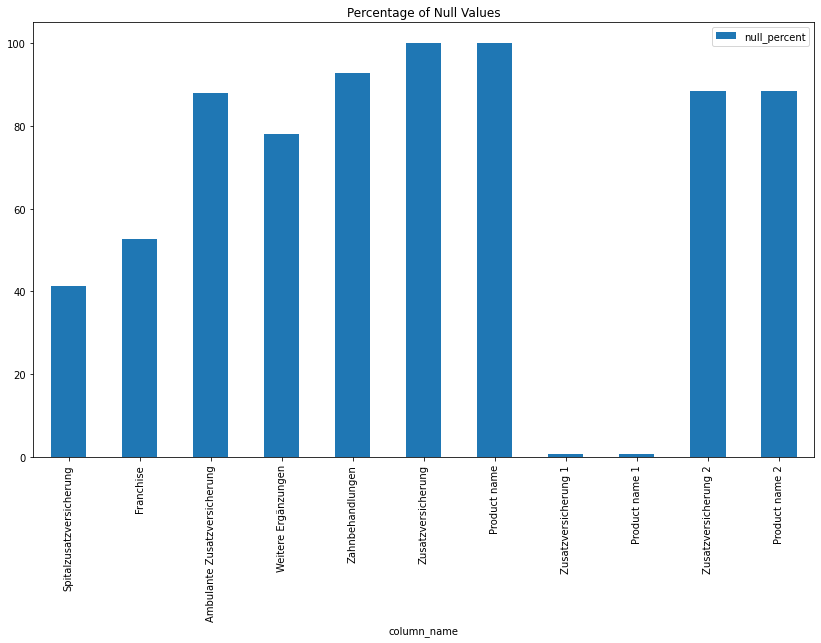

In [193]:
null_columns_dataframe.plot(kind = 'bar',title= 'Percentage of Null Values', figsize = (14,8))
plt.show()

#### It can be seen from the bar chart that some columns have substantially greater number of null values while some has negligible null values. In order to reduce the number of areas to check for further anamolies, those columns with high null value percentage can be omitted and also null observations from the columns with significantly low null values can be omitted too. 

In [194]:
# I have considered columns with null values greater than 40% holds very importance in carrying out insights from a dataset. 
useless_columns = list(null_columns_dataframe.loc[null_columns_dataframe['null_percent'] > 40].index)

In [195]:
df.drop(columns = useless_columns, inplace = True)

In [196]:
# Also another assumption I made to help me finding out further anamolies in the dataset is that the null observations of the columns with null values lesser
# than one percent also holds very less importance in the dataset
useless_row_containing_columns = list(null_columns_dataframe.loc[null_columns_dataframe['null_percent'] < 1].index)

In [197]:
df.dropna(subset=useless_row_containing_columns, inplace=True)

#### All the null values have been dropped. Had the null percentage in any column been between 1-40 %, we would have to assign certain median values to the numeric series and mode value to the categorical series.

## Looking for outliers
#### Here is handful of columns remaining so I have chosen to look for outliers manually using the describe() method for the numeric columns and value_count() method for the categoric columns by the help of which any deviation or outliers can be easily spotted. For e.g.

In [201]:
df['Zusatzversicherung 1'].describe()

count    4.304258e+06
mean     5.270110e+01
std      6.614054e+01
min      3.000000e-01
25%      1.380000e+01
50%      2.930000e+01
75%      6.030000e+01
max      6.342000e+02
Name: Zusatzversicherung 1, dtype: float64

#### This columns seems to have high standard deviation. This refers that this column has skewed distribution. 

#### Except than that column, all columns seem well inputed. There seems no unrealizable deviation in any of the other columns. Now, lets remove all the duplicate entries and a making the dataset more understandable, short and clean.

In [164]:
# Lastly, dropping all the duplicate entries.
df.drop_duplicates(inplace=True, ignore_index=True)

In [166]:
df.rename(columns={ 'Unfallzusatz in den Zusatzversicherungen' : 'accident_supplement', 
                    'Zusatzversicherung 1' : 'additional_insurance', 'Product name 1' : 'product_name' }, inplace = True)

## Exporting the final dataframe for further visualization in the BI Tool called Power BI.

In [180]:
df.to_csv("cleaned_dataset.csv", index=False)

In [183]:
df.head()

,post_code,dob,gender,accident_supplement,name,additional_insurance,product_name
0,5000,2020,Male,True,Visana,0.3,Spital allgemein
1,1473,2020,Male,True,Visana,0.4,Spital allgemein
2,2013,2020,Male,True,Visana,0.4,Spital allgemein
3,8836,2020,Male,True,Visana,0.3,Spital allgemein
4,6300,2020,Male,True,Visana,0.3,Spital allgemein
